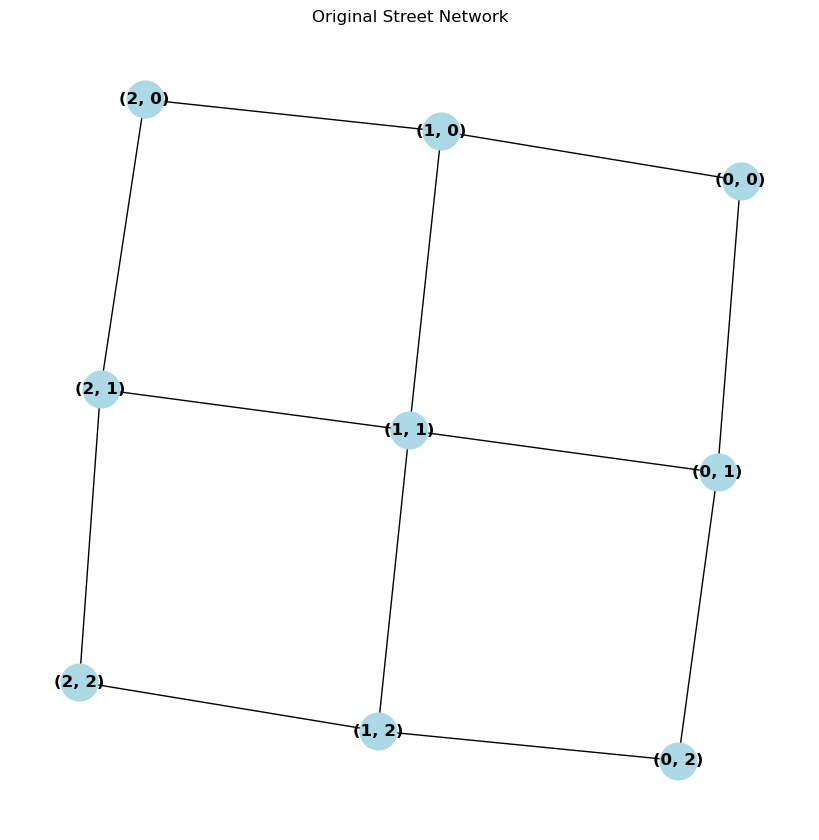

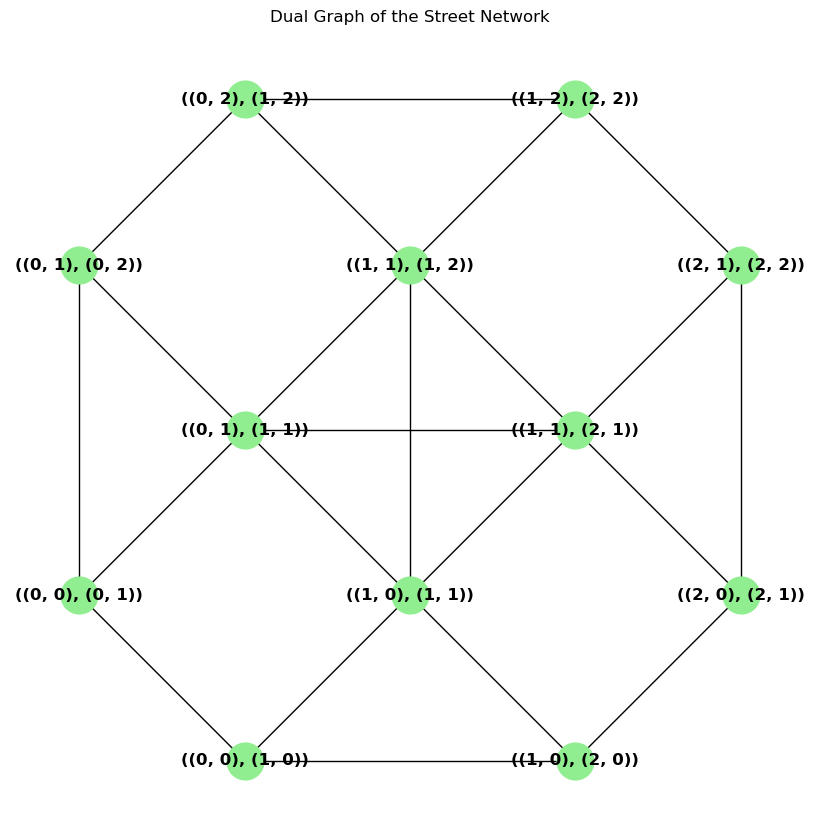

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建一个新的图对象
G = nx.Graph()

# 添加节点
nodes = [(i, j) for i in range(3) for j in range(3)]
G.add_nodes_from(nodes)

# 添加边
# 井字形状的边连接
edges = [((0, 0), (0, 1)), ((0, 1), (0, 2)),
         ((1, 0), (1, 1)), ((1, 1), (1, 2)),
         ((2, 0), (2, 1)), ((2, 1), (2, 2)),
         ((0, 0), (1, 0)), ((1, 0), (2, 0)),
         ((0, 1), (1, 1)), ((1, 1), (2, 1)),
         ((0, 2), (1, 2)), ((1, 2), (2, 2))]
G.add_edges_from(edges)

# 绘制原始图
plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=700, font_weight='bold')
plt.title("Original Street Network")
plt.show()

# 构建对偶图
# 在对偶图中，原始图的每条边都变成了一个节点
dual_G = nx.Graph()

# 添加对偶图的节点
for edge in G.edges():
    dual_G.add_node(edge)

# 添加对偶图的边
for edge1 in G.edges():
    for edge2 in G.edges():
        if edge1 != edge2 and set(edge1).intersection(edge2):
            dual_G.add_edge(edge1, edge2)

# 绘制对偶图
plt.figure(figsize=(8, 8))
pos = {edge: [(edge[0][0] + edge[1][0]) / 2, (edge[0][1] + edge[1][1]) / 2] for edge in dual_G.nodes()}
nx.draw(dual_G, pos, with_labels=True, node_color='lightgreen', node_size=700, font_weight='bold')
plt.title("Dual Graph of the Street Network")
plt.show()

C:\Users\BYANG4EVER\.conda\envs\python_igraph\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\BYANG4EVER\AppData\Local\Temp\ipykernel_33532\191936159.py:16: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  W = weights.Queen.from_dataframe(streets)


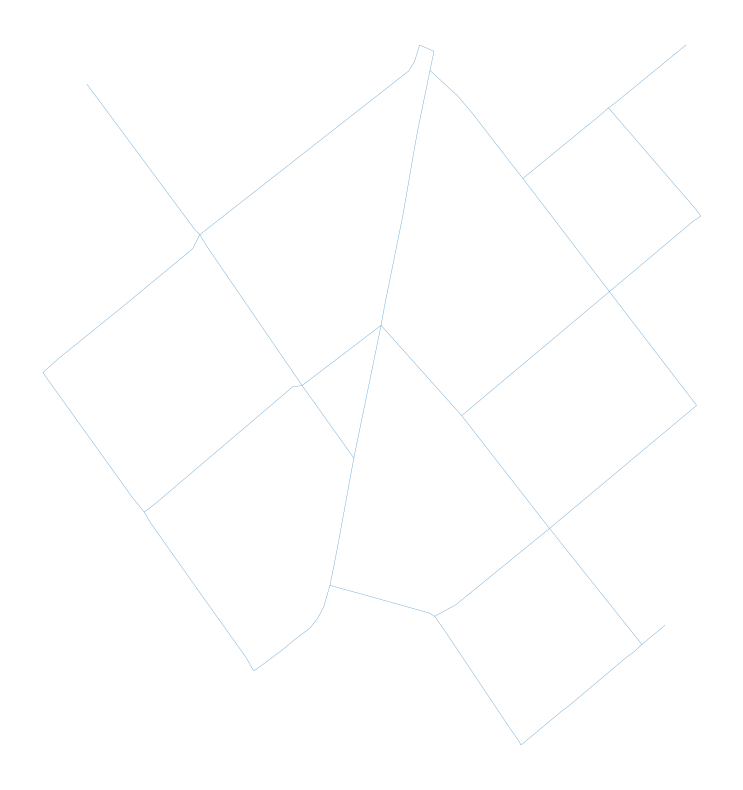

In [1]:
import osmnx as ox
import momepy
import geopandas as gpd
import matplotlib.pyplot as plt
from libpysal import weights
import collections
#原始图
wurster_hall = (41.4071495, 2.1632748)
one_mile = 200
streets_graph = ox.graph_from_point(wurster_hall, dist=one_mile, network_type="drive")
streets = ox.graph_to_gdfs(ox.get_undirected(streets_graph), nodes=False, edges=True,
                                   node_geometry=False, fill_edge_geometry=True)

streets.plot(figsize=(10, 10), linewidth=0.2).set_axis_off()

W = weights.Queen.from_dataframe(streets)
# Convert the graph to networkx
G_dual = W.to_networkx()

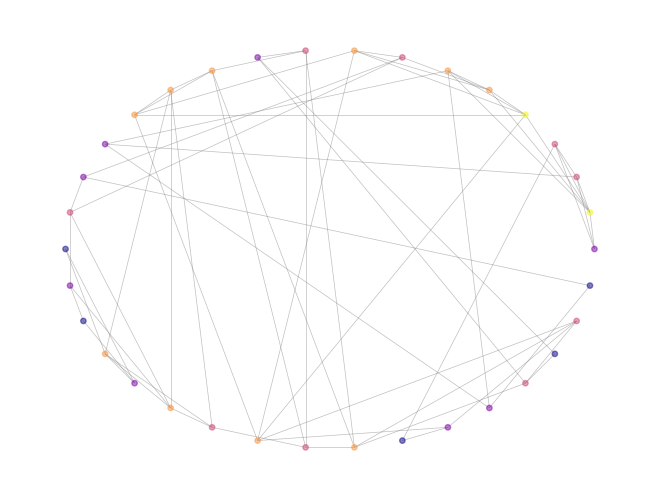

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
import numpy as np

pos = nx.circular_layout(G_dual)
# Create a color map based on the degree of the nodes
degree_sequence = [d for n, d in G_dual.degree()]
max_degree = max(degree_sequence)
min_degree = min(degree_sequence)

# Normalize the degrees to fit within the range of the color map
degree_color = cm.plasma([(d - min_degree) / (max_degree - min_degree) for d in degree_sequence])

# Draw the nodes with the new layout and the colormap based on degree
# Reduce the node size and add transparency (alpha)
nx.draw(G_dual, pos, node_size=15, node_color=degree_color, edge_color='gray', width=0.5, alpha=0.5)

# Show the plot
plt.show()

In [3]:
# 获取节点连边
edges = G_dual.edges()
nodes = G_dual.nodes()

# 计算平均度
average_degree = sum(dict(G_dual.degree()).values()) / len(nodes)
# 打印网络信息
print("节点数量:", len(nodes))
print("连边数量:", len(edges))
print("平均度:", average_degree)
print("集聚系数:", clustering_coefficient)

节点数量: 34
连边数量: 66
平均度: 3.8823529411764706
集聚系数: 0.4186274509803923
网络直径: 7
平均最短路径长度: 3.3244206773618536
节点度中心性: {0: 0.09090909090909091, 1: 0.18181818181818182, 2: 0.12121212121212122, 3: 0.12121212121212122, 4: 0.18181818181818182, 5: 0.15151515151515152, 6: 0.15151515151515152, 7: 0.12121212121212122, 8: 0.15151515151515152, 9: 0.12121212121212122, 10: 0.09090909090909091, 11: 0.15151515151515152, 12: 0.15151515151515152, 13: 0.15151515151515152, 14: 0.09090909090909091, 15: 0.09090909090909091, 16: 0.12121212121212122, 17: 0.06060606060606061, 18: 0.09090909090909091, 19: 0.06060606060606061, 20: 0.15151515151515152, 21: 0.09090909090909091, 22: 0.15151515151515152, 23: 0.12121212121212122, 24: 0.15151515151515152, 25: 0.12121212121212122, 26: 0.15151515151515152, 27: 0.06060606060606061, 28: 0.09090909090909091, 29: 0.09090909090909091, 30: 0.12121212121212122, 31: 0.06060606060606061, 32: 0.12121212121212122, 33: 0.06060606060606061}
节点接近中心性: {0: 0.264, 1: 0.336734693877551, 2: 0.

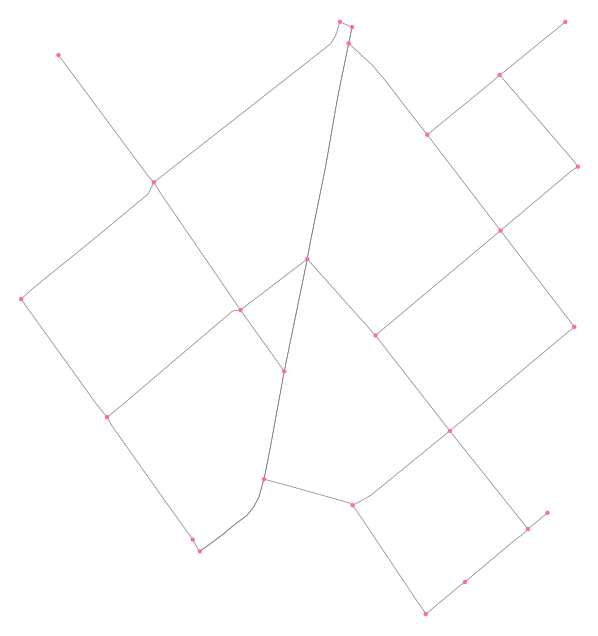

C:\Users\BYANG4EVER\.conda\envs\python_igraph\Lib\site-packages\osmnx\utils_graph.py:512: FutureWarning: <class 'geopandas.array.GeometryArray'>._reduce will require a `keepdims` parameter in the future
  dupes = edges[mask].dropna(subset=["geometry"])


{'n': 26,
 'm': 34,
 'k_avg': 2.6153846153846154,
 'edge_length_total': 2420.9160000000006,
 'edge_length_avg': 71.2034117647059,
 'streets_per_node_avg': 3.4615384615384617,
 'streets_per_node_counts': {0: 0, 1: 0, 2: 0, 3: 14, 4: 12},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.0,
  2: 0.0,
  3: 0.5384615384615384,
  4: 0.46153846153846156},
 'intersection_count': 26,
 'street_length_total': 2420.9160000000006,
 'street_segment_count': 34,
 'street_length_avg': 71.2034117647059,
 'circuity_avg': 1.0023604058437032,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 22,
 'node_density_km': 254.0121889500078,
 'intersection_density_km': 254.0121889500078,
 'edge_density_km': 23651.622016311434,
 'street_density_km': 23651.622016311434,
 'clean_intersection_density_km': 214.9333906500066}

In [11]:
wurster_hall = (41.4071495, 2.1632748)
one_mile = 200
graph = ox.graph_from_point(wurster_hall, dist=one_mile, network_type="drive")
fig, ax = ox.plot_graph(graph, figsize=(8, 8), node_size=10, node_color="hotpink", edge_color="gray", edge_linewidth=0.5, bgcolor='white')
M = ox.utils_graph.get_undirected(graph)
G_proj = ox.project_graph(M)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
ox.basic_stats(G_proj, area=graph_area_m, clean_int_tol=15)

C:\Users\BYANG4EVER\AppData\Local\Temp\ipykernel_22316\3451990485.py:23: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  W = weights.Queen.from_dataframe(stroke_gdf)


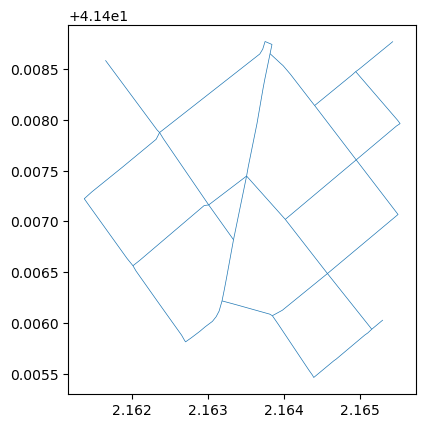

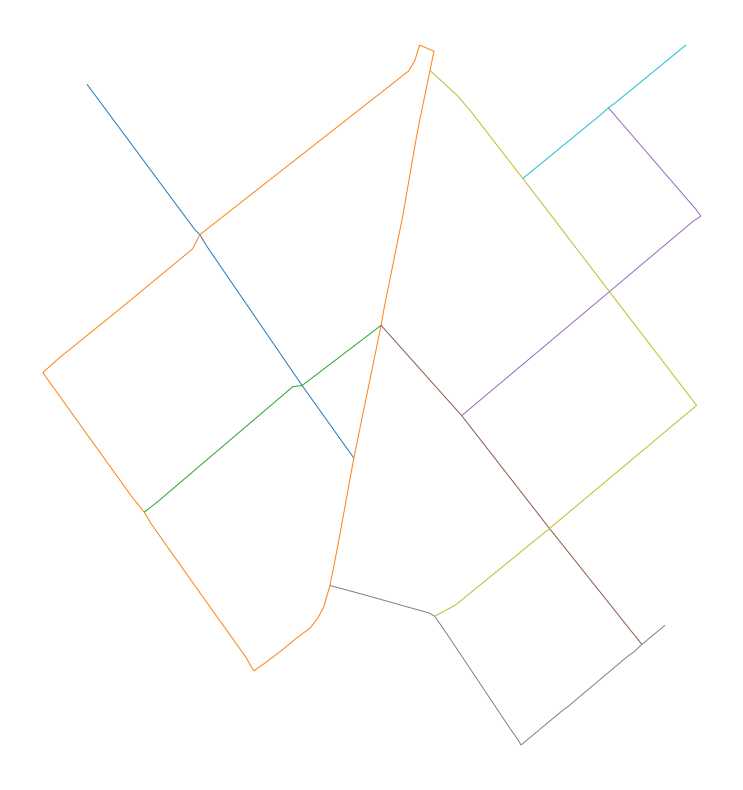

In [15]:
import osmnx as ox
import momepy
import geopandas as gpd
import matplotlib.pyplot as plt
from libpysal import weights
import collections
#原始图
wurster_hall = (41.4071495, 2.1632748)
one_mile = 200
streets_graph = ox.graph_from_point(wurster_hall, dist=one_mile, network_type="drive")
streets = ox.graph_to_gdfs(ox.get_undirected(streets_graph), nodes=False, edges=True,
                                   node_geometry=False, fill_edge_geometry=True)

#coins算法合并道路段
coins = momepy.COINS(streets)
stroke_gdf = coins.stroke_gdf()
stroke_gdf.plot(markersize=0.01, linewidth=0.5)
stroke_gdf

stroke_gdf.plot(cmap="tab10", linewidth=0.7, figsize=(10, 10)).set_axis_off()

W = weights.Queen.from_dataframe(stroke_gdf)
# Convert the graph to networkx
G_dual = W.to_networkx()

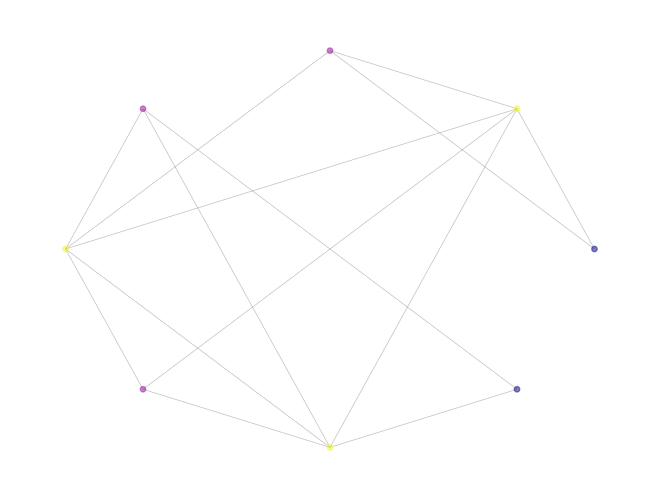

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
import numpy as np

pos = nx.circular_layout(G_dual)
# Create a color map based on the degree of the nodes
degree_sequence = [d for n, d in G_dual.degree()]
max_degree = max(degree_sequence)
min_degree = min(degree_sequence)

# Normalize the degrees to fit within the range of the color map
degree_color = cm.plasma([(d - min_degree) / (max_degree - min_degree) for d in degree_sequence])

# Draw the nodes with the new layout and the colormap based on degree
# Reduce the node size and add transparency (alpha)
nx.draw(G_dual, pos, node_size=15, node_color=degree_color, edge_color='gray', width=0.5, alpha=0.5)

# Show the plot
plt.show()

C:\Users\BYANG4EVER\.conda\envs\python_igraph\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


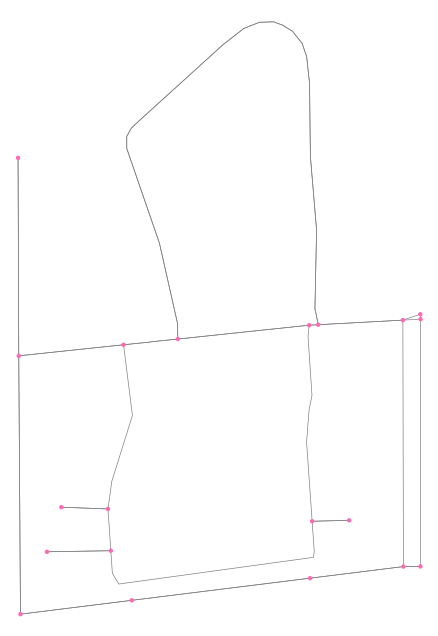

C:\Users\BYANG4EVER\.conda\envs\python_igraph\Lib\site-packages\osmnx\utils_graph.py:512: FutureWarning: <class 'geopandas.array.GeometryArray'>._reduce will require a `keepdims` parameter in the future
  dupes = edges[mask].dropna(subset=["geometry"])


{'n': 20,
 'm': 24,
 'k_avg': 2.4,
 'edge_length_total': 3671.9980000000005,
 'edge_length_avg': 152.99991666666668,
 'streets_per_node_avg': 3.2,
 'streets_per_node_counts': {0: 0, 1: 3, 2: 0, 3: 9, 4: 6, 5: 2},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.15,
  2: 0.0,
  3: 0.45,
  4: 0.3,
  5: 0.1},
 'intersection_count': 17,
 'street_length_total': 3671.9980000000005,
 'street_segment_count': 24,
 'street_length_avg': 152.99991666666668,
 'circuity_avg': 1.241997076723387,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 13,
 'node_density_km': 115.16387578981534,
 'intersection_density_km': 97.88929442134304,
 'edge_density_km': 21144.07607862252,
 'street_density_km': 21144.07607862252,
 'clean_intersection_density_km': 74.85651926337997}

In [1]:
import osmnx as ox
import momepy
import geopandas as gpd
import matplotlib.pyplot as plt
from libpysal import weights
import collections
#原始图
wurster_hall = (39.9641802, 116.5304040)
one_mile = 300
graph = ox.graph_from_point(wurster_hall, dist=one_mile, network_type="drive")
fig, ax = ox.plot_graph(graph, figsize=(8, 8), node_size=10, node_color="hotpink", edge_color="gray", edge_linewidth=0.5, bgcolor='white')
M = ox.utils_graph.get_undirected(graph)
G_proj = ox.project_graph(M)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
ox.basic_stats(G_proj, area=graph_area_m, clean_int_tol=15)

C:\Users\BYANG4EVER\AppData\Local\Temp\ipykernel_32060\2388719822.py:23: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  W = weights.Queen.from_dataframe(stroke_gdf)


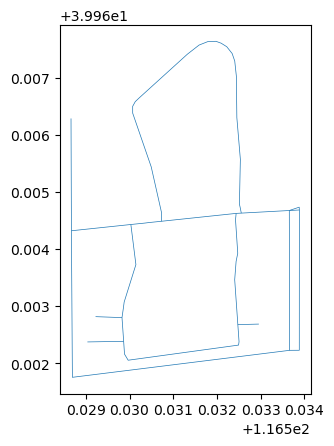

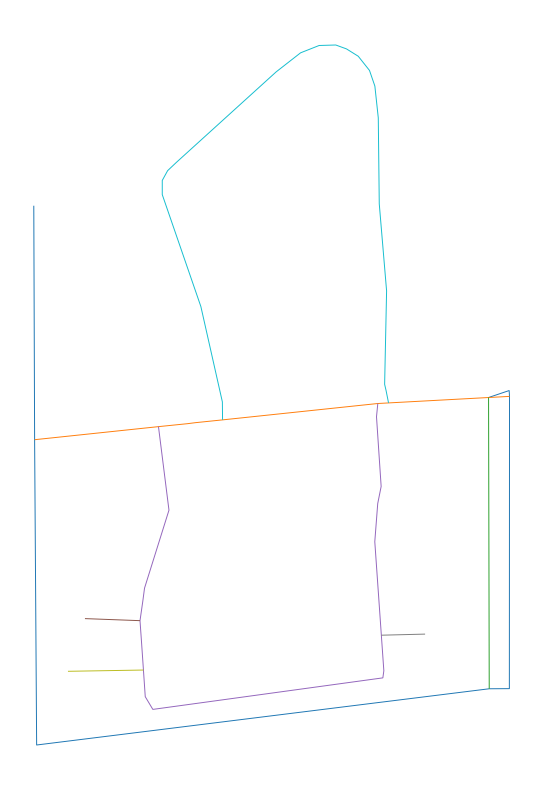

In [4]:
import osmnx as ox
import momepy
import geopandas as gpd
import matplotlib.pyplot as plt
from libpysal import weights
import collections
#原始图
wurster_hall = (39.9641802, 116.5304040)
one_mile = 300
streets_graph = ox.graph_from_point(wurster_hall, dist=one_mile, network_type="drive")
streets = ox.graph_to_gdfs(ox.get_undirected(streets_graph), nodes=False, edges=True,
                                   node_geometry=False, fill_edge_geometry=True)

#coins算法合并道路段
coins = momepy.COINS(streets)
stroke_gdf = coins.stroke_gdf()
stroke_gdf.plot(markersize=0.01, linewidth=0.5)
stroke_gdf

stroke_gdf.plot(cmap="tab10", linewidth=0.7, figsize=(10, 10)).set_axis_off()

W = weights.Queen.from_dataframe(stroke_gdf)
# Convert the graph to networkx
G_dual = W.to_networkx()

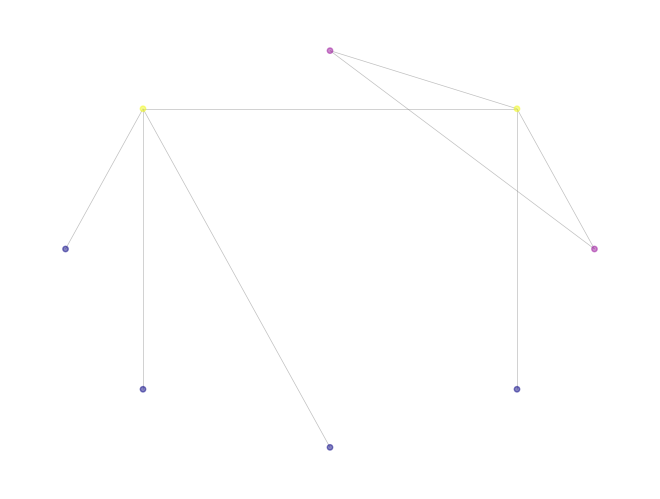

节点数量: 8
连边数量: 8
平均度: 2.0


In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
import numpy as np

# Assuming G_dual is your graph
# Use the kamada_kawai_layout for better spacing in large graphs
pos = nx.circular_layout(G_dual)
# Create a color map based on the degree of the nodes
degree_sequence = [d for n, d in G_dual.degree()]
max_degree = max(degree_sequence)
min_degree = min(degree_sequence)

# Normalize the degrees to fit within the range of the color map
degree_color = cm.plasma([(d - min_degree) / (max_degree - min_degree) for d in degree_sequence])

# Draw the nodes with the new layout and the colormap based on degree
# Reduce the node size and add transparency (alpha)
nx.draw(G_dual, pos, node_size=15, node_color=degree_color, edge_color='gray', width=0.5, alpha=0.5)

# Show the plot
plt.show()

# 获取节点连边
edges = G_dual.edges()
nodes = G_dual.nodes()

# 计算平均度
average_degree = sum(dict(G_dual.degree()).values()) / len(nodes)
# 打印网络信息
print("节点数量:", len(nodes))
print("连边数量:", len(edges))
print("平均度:", average_degree)